In [1]:
import sys
sys.path.append("..")
import pandas as pd

In [7]:
from ethicml.algorithms.inprocess import LR, SVM, Agarwal, Kamiran, Kamishima, LRCV, ZafarEqOpp
from ethicml.evaluators import CrossValidator, run_metrics, evaluate_models_async, load_results
from ethicml.data import Compas, Adult, load_data
from ethicml.metrics import Accuracy, ProbPos, TPR, TNR, AbsCV, GetInfo
from ethicml.preprocessing import train_test_split, ProportionalSplit
from ethicml.visualisation.plot import plot_results, single_plot

In [3]:
from ethicml_models.tuning_lr import TuningLr, DPFlags, EOFlags

In [4]:
data = [
    Compas("Race"),
    Compas("Sex"),
#     Adult("Race"),
#     Adult("Sex"),
]

In [5]:
use_s = True
epochs = 0

await evaluate_models_async(
    datasets=data,
    inprocess_models=[
        TuningLr(use_s=use_s, epochs=epochs),

        TuningLr(fair=True, debiasing_args=EOFlags(p_ybary1_s0=.9, p_ybary1_s1=.9, p_ybary0_s0=.6, p_ybary0_s1=.6), use_s=use_s, epochs=epochs),
        TuningLr(fair=True, debiasing_args=EOFlags(p_ybary1_s0=.9, p_ybary1_s1=.9, p_ybary0_s0=.65, p_ybary0_s1=.65), use_s=use_s, epochs=epochs),
        TuningLr(fair=True, debiasing_args=EOFlags(p_ybary1_s0=1., p_ybary1_s1=1., p_ybary0_s0=.65, p_ybary0_s1=.65), use_s=use_s, epochs=epochs),
        TuningLr(fair=True, debiasing_args=EOFlags(p_ybary1_s0=1., p_ybary1_s1=1., p_ybary0_s0=.6, p_ybary0_s1=.6), use_s=use_s, epochs=epochs),
        TuningLr(fair=True, debiasing_args=EOFlags(p_ybary1_s0=1., p_ybary1_s1=1., p_ybary0_s0=.7, p_ybary0_s1=.7), use_s=use_s, epochs=epochs),
    ],
    metrics=[Accuracy(), TPR(), TNR(), GetInfo("t_s0"), GetInfo("t_s1"), GetInfo("TPR_t"), GetInfo("TNR_t")],
    per_sens_metrics=[TPR(), TNR()],
    repeats=0,
    topic="eo_bound",
    splitter=ProportionalSplit(),
    max_parallel=2,
)

In [10]:
results = load_results(data[0].name, "no_transform", "eo_bound")
results.append_df(load_results(data[1].name, "no_transform", "eo_bound").data)

In [11]:
results.data

Accuracy  \
dataset     transform    model                                              split_id             
Compas Race no_transform TuningLR, wd: 0.1, RAdam, use s                    0         0.454988   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.454988   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.454988   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.454988   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.454988   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.454988   
Compas Sex  no_transform TuningLR, wd: 0.1, RAdam, use s                    0         0.455429   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.455429   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.455429   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.455429   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.455429   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.455429   

                                                                                      TNR  \
dataset     transform    model                                              split_id        
Compas Race no_transform TuningLR, wd: 0.1, RAdam, use s                    0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.0   
Compas Sex  no_transform TuningLR, wd: 0.1, RAdam, use s                    0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0         0.0   

                                                                                      TNR_race_0  \
dataset     transform    model                                              split_id               
Compas Race no_transform TuningLR, wd: 0.1, RAdam, use s                    0                0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0                0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0                0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0                0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0                0.0   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0                0.0   
Compas Sex  no_transform TuningLR, wd: 0.1, RAdam, use s                    0                NaN   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0                NaN   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 0.9, TN... 0                NaN   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0                NaN   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0                NaN   
                         TuningLR, wd: 0.1, RAdam, use s, TPR_t: 1.0, TN... 0                NaN   

         

In [19]:
figs_and_plots = plot_results(results, "t_s0", "TPR_t", ptype="scatter")

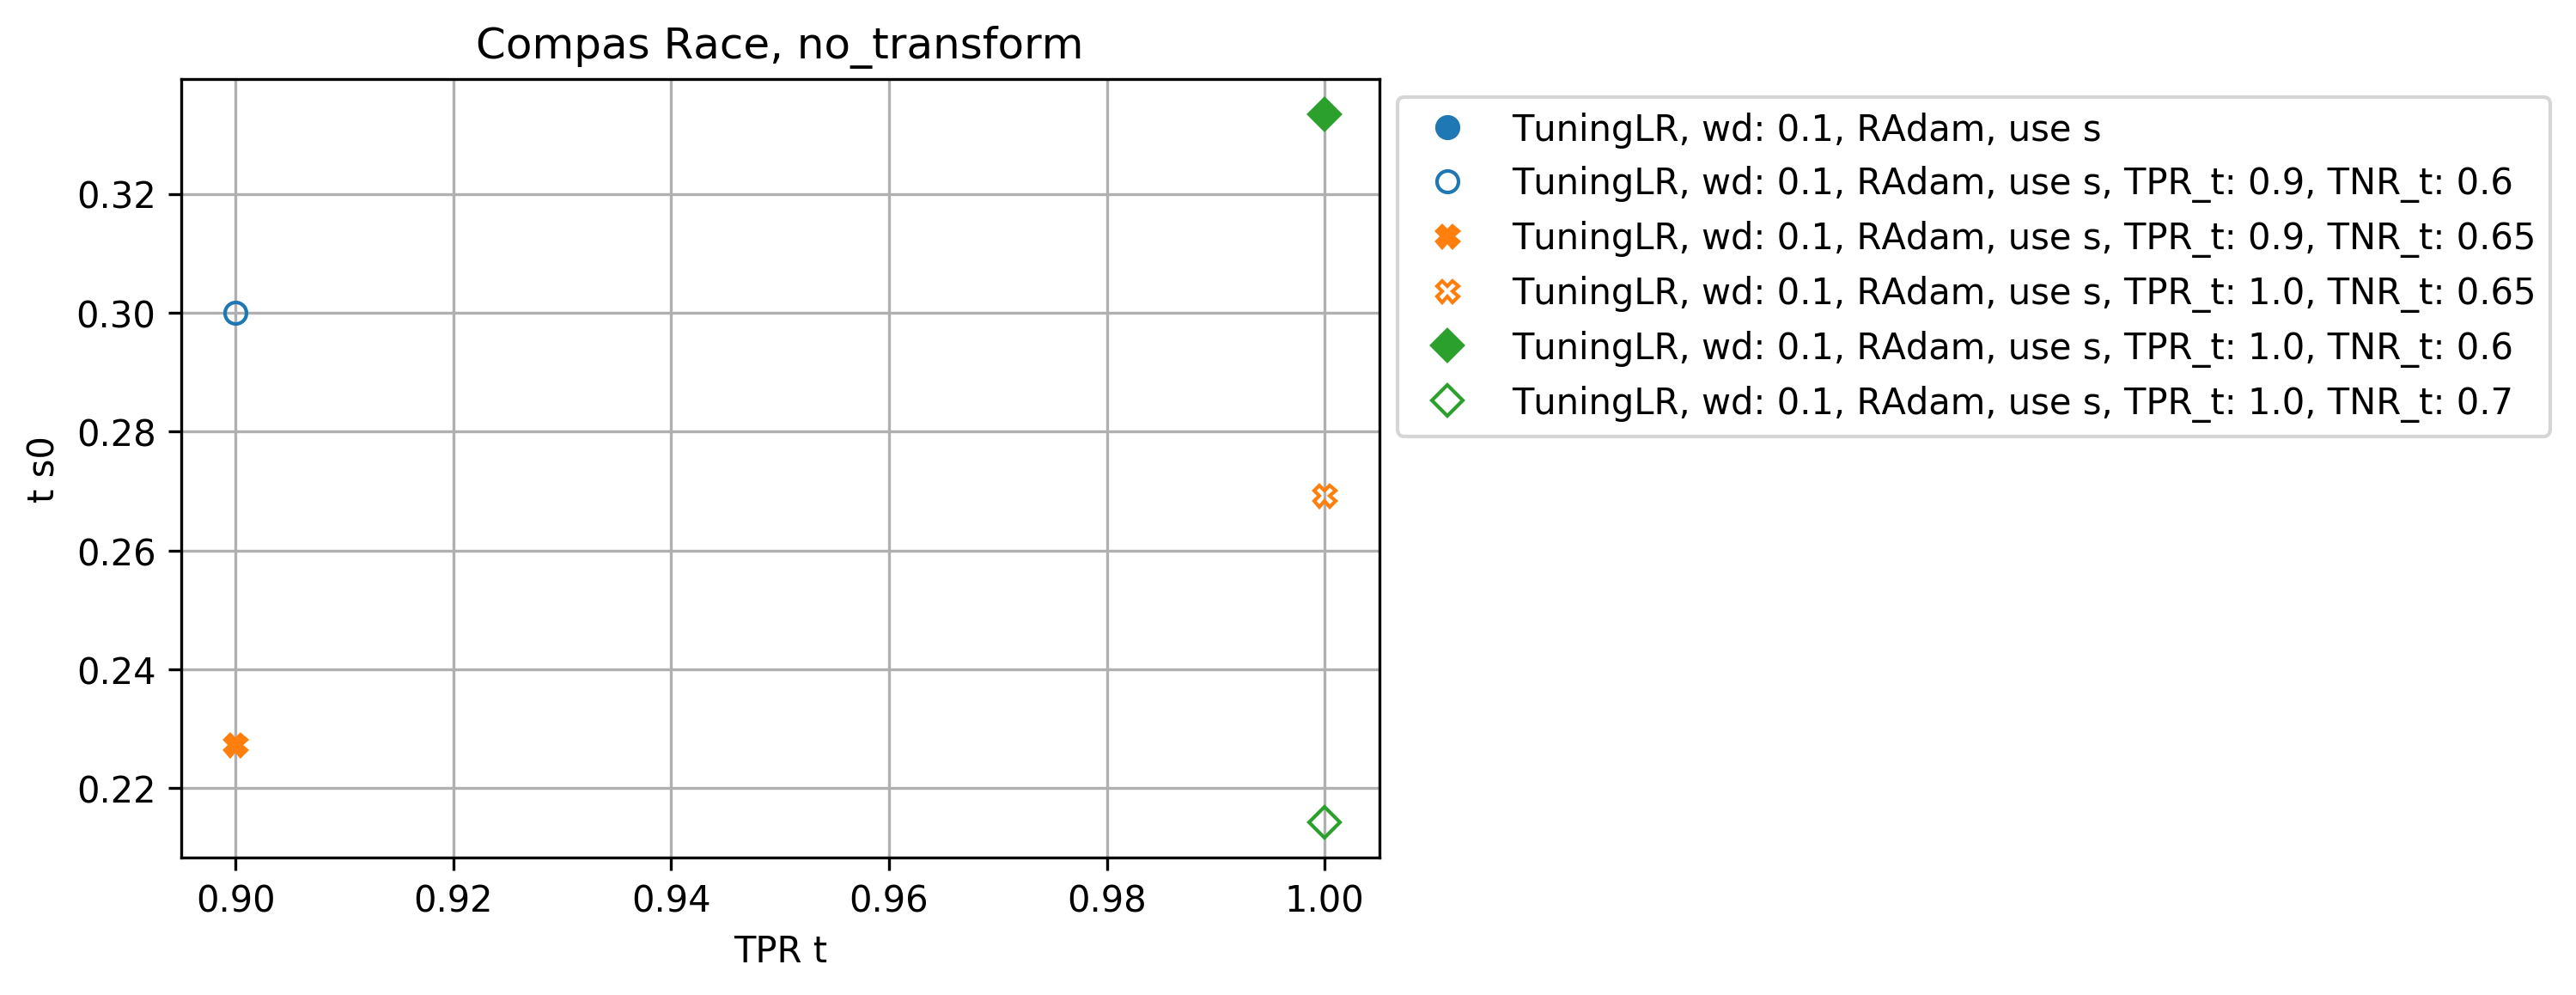

In [20]:
figs_and_plots[0][0]

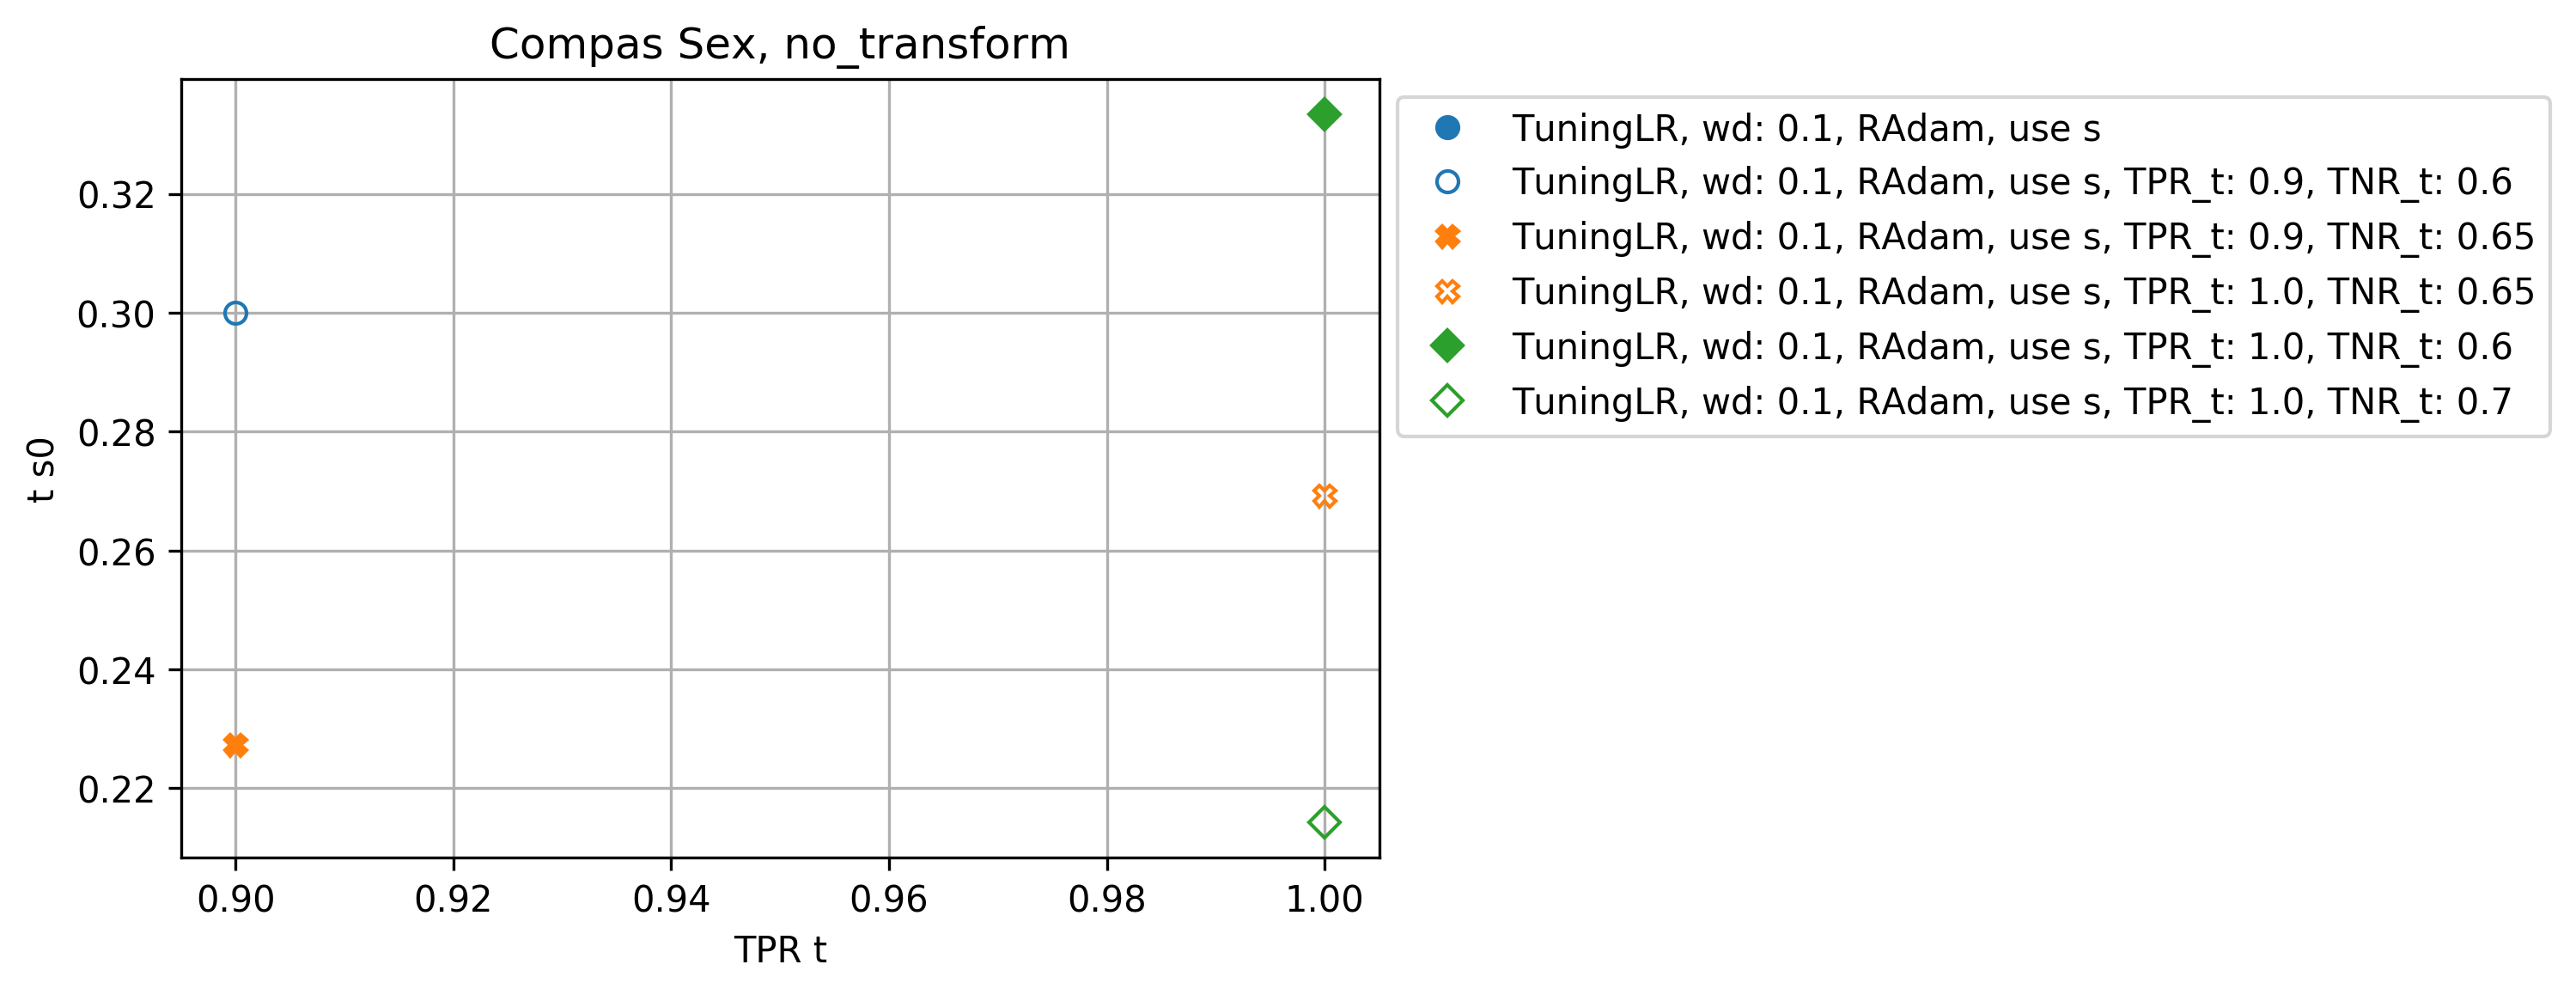

In [21]:
figs_and_plots[1][0]

In [22]:
figs_and_plots = plot_results(results, "t_s1", "TPR_t", ptype="scatter")

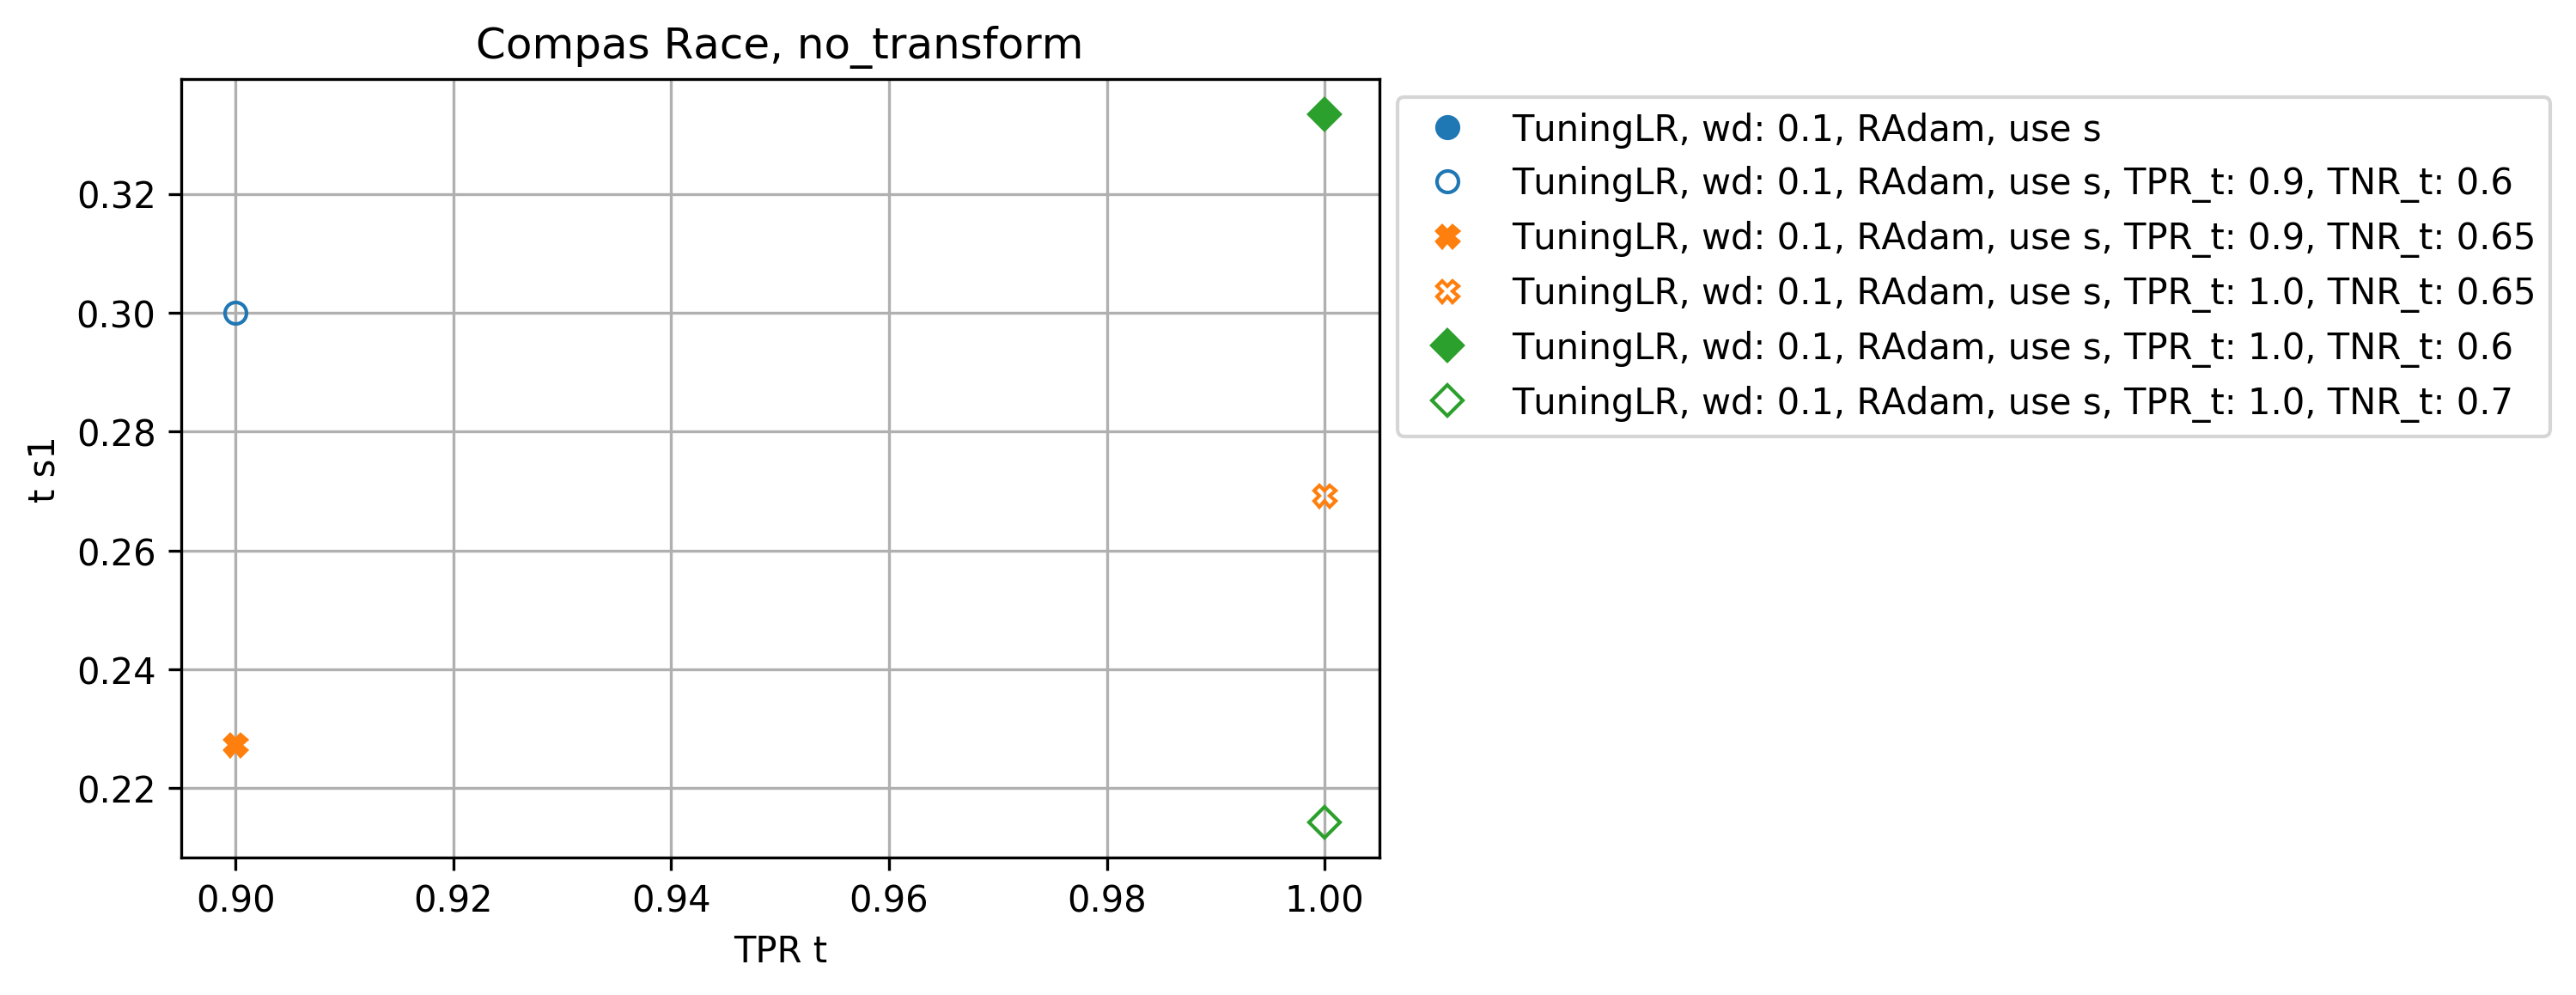

In [23]:
figs_and_plots[0][0]

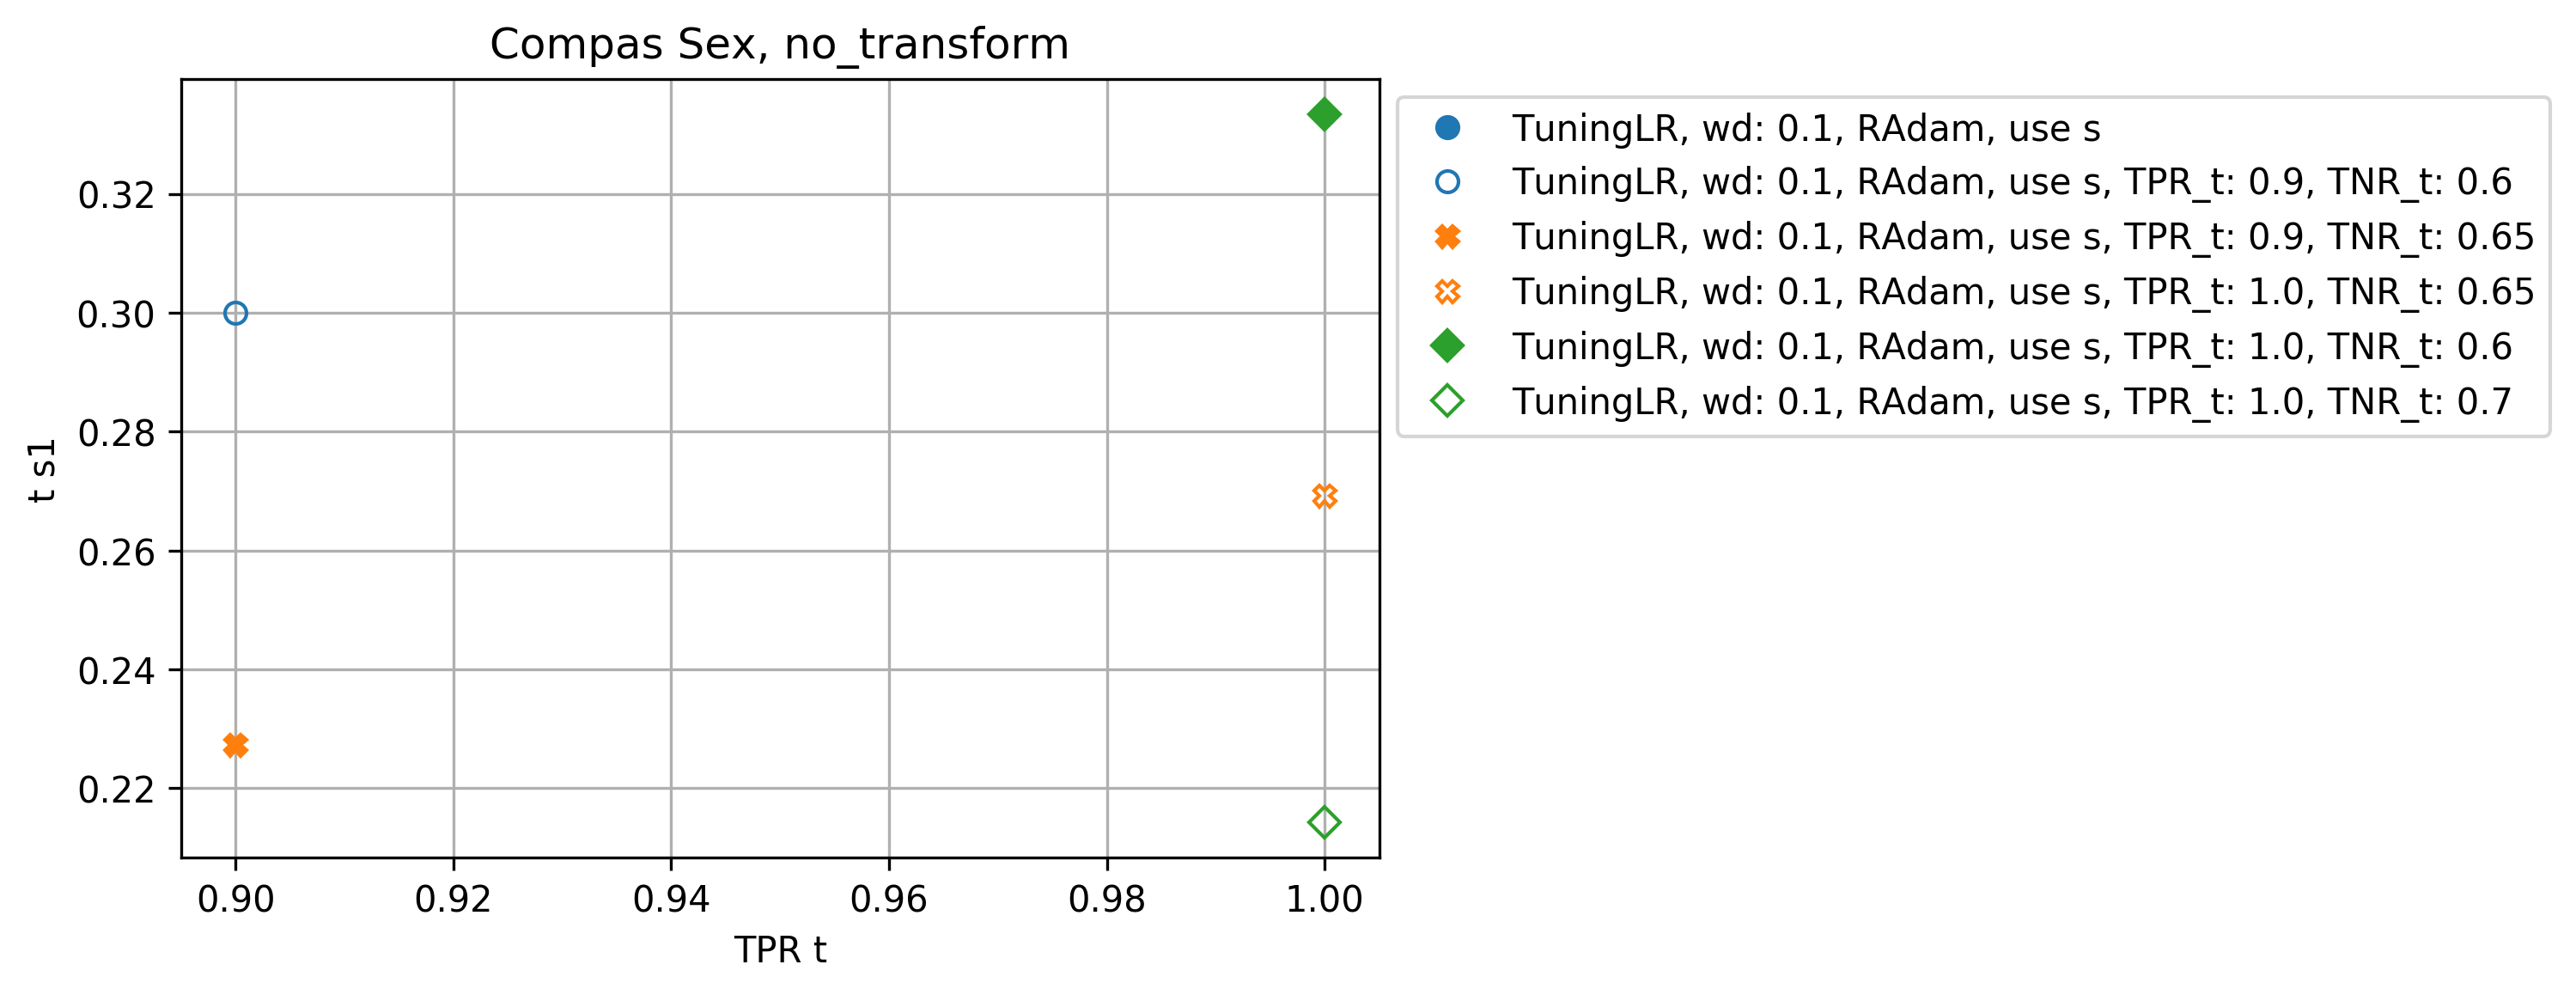

In [24]:
figs_and_plots[1][0]

In [25]:
figs_and_plots = plot_results(results, "t_s0", "TNR_t", ptype="scatter")

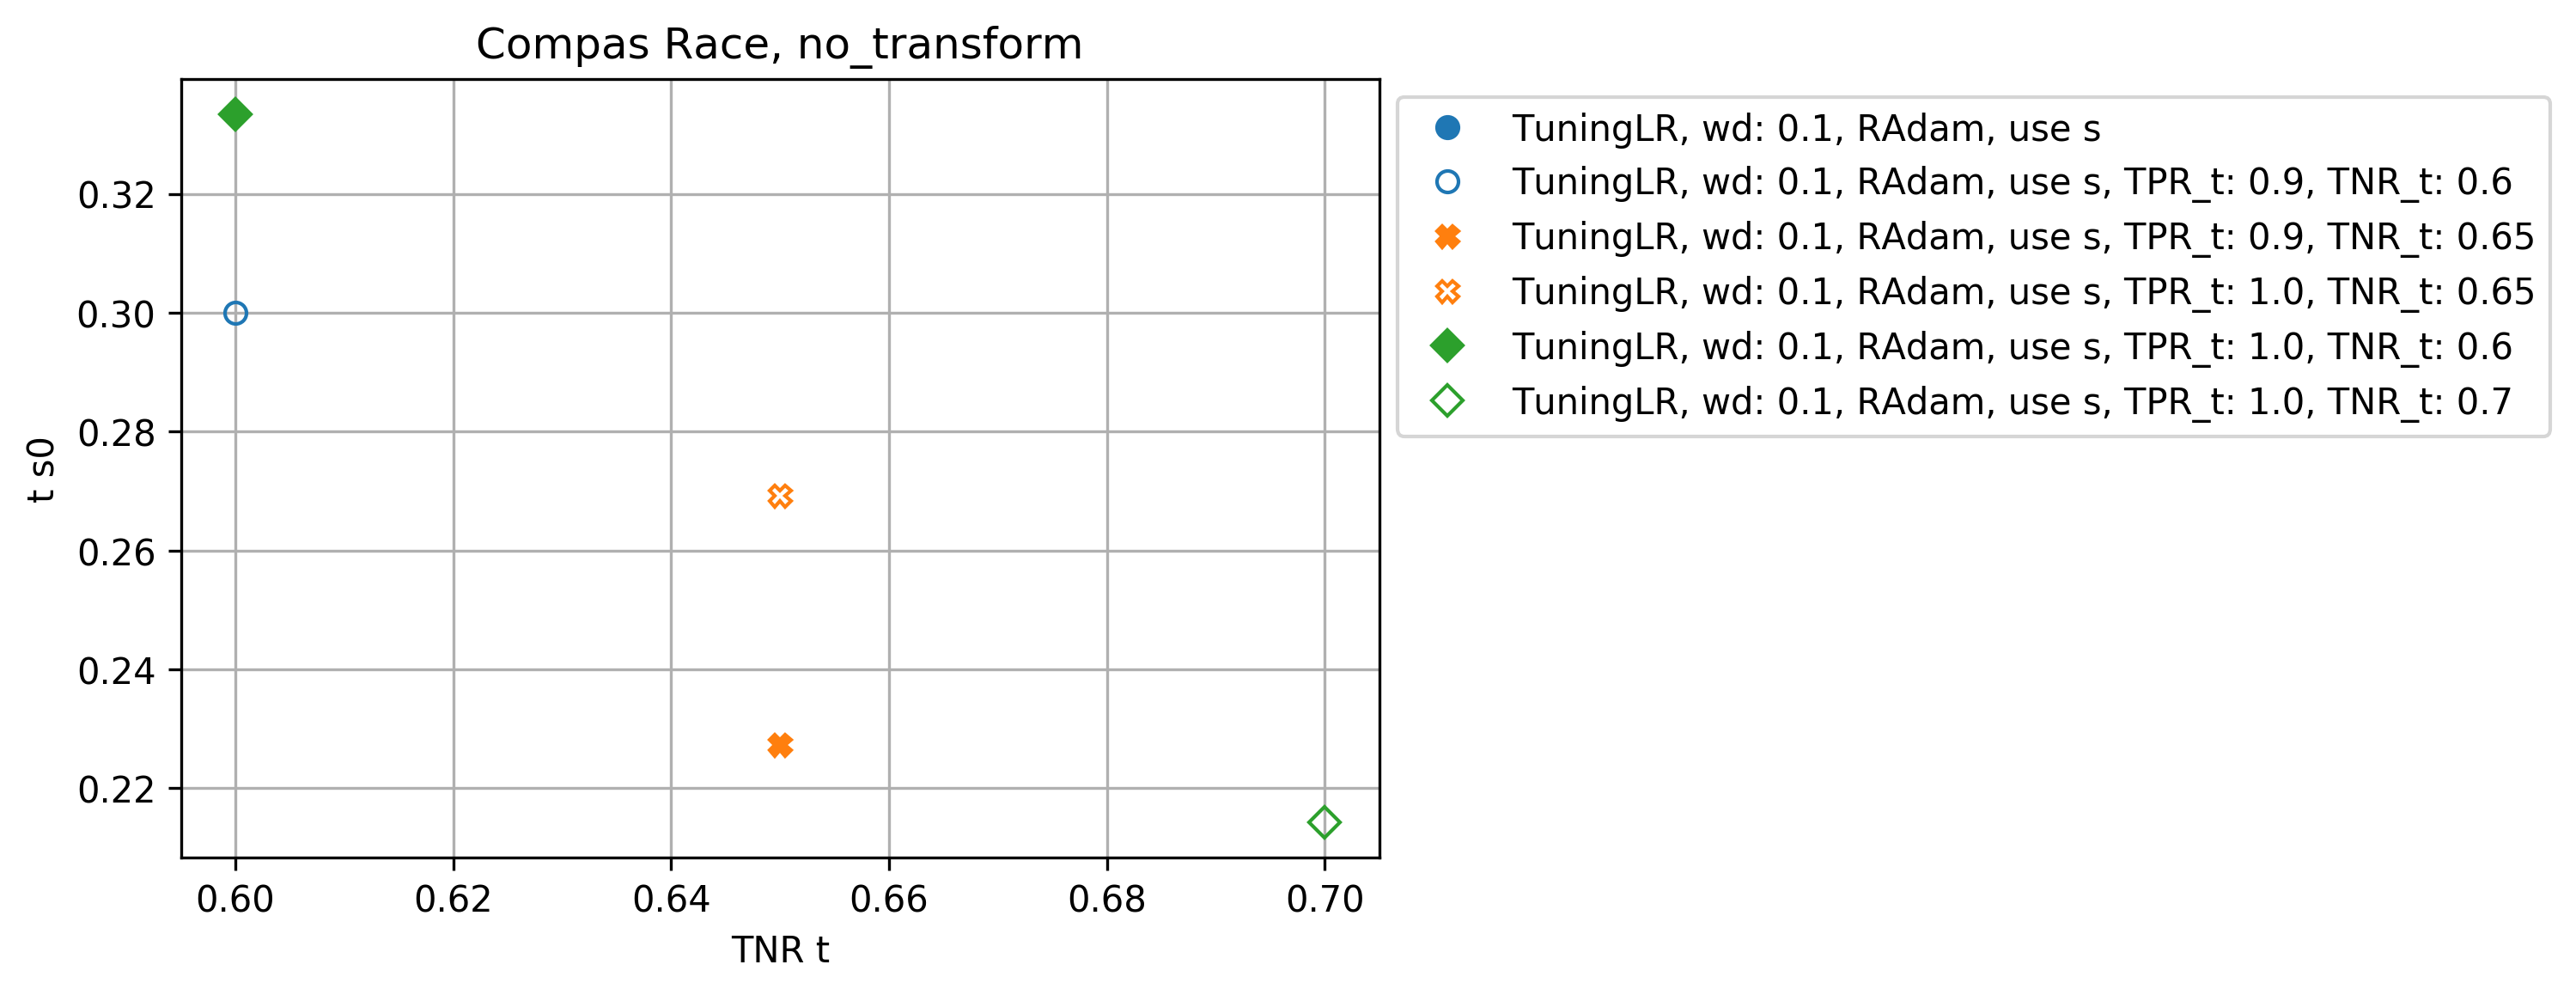

In [26]:
figs_and_plots[0][0]

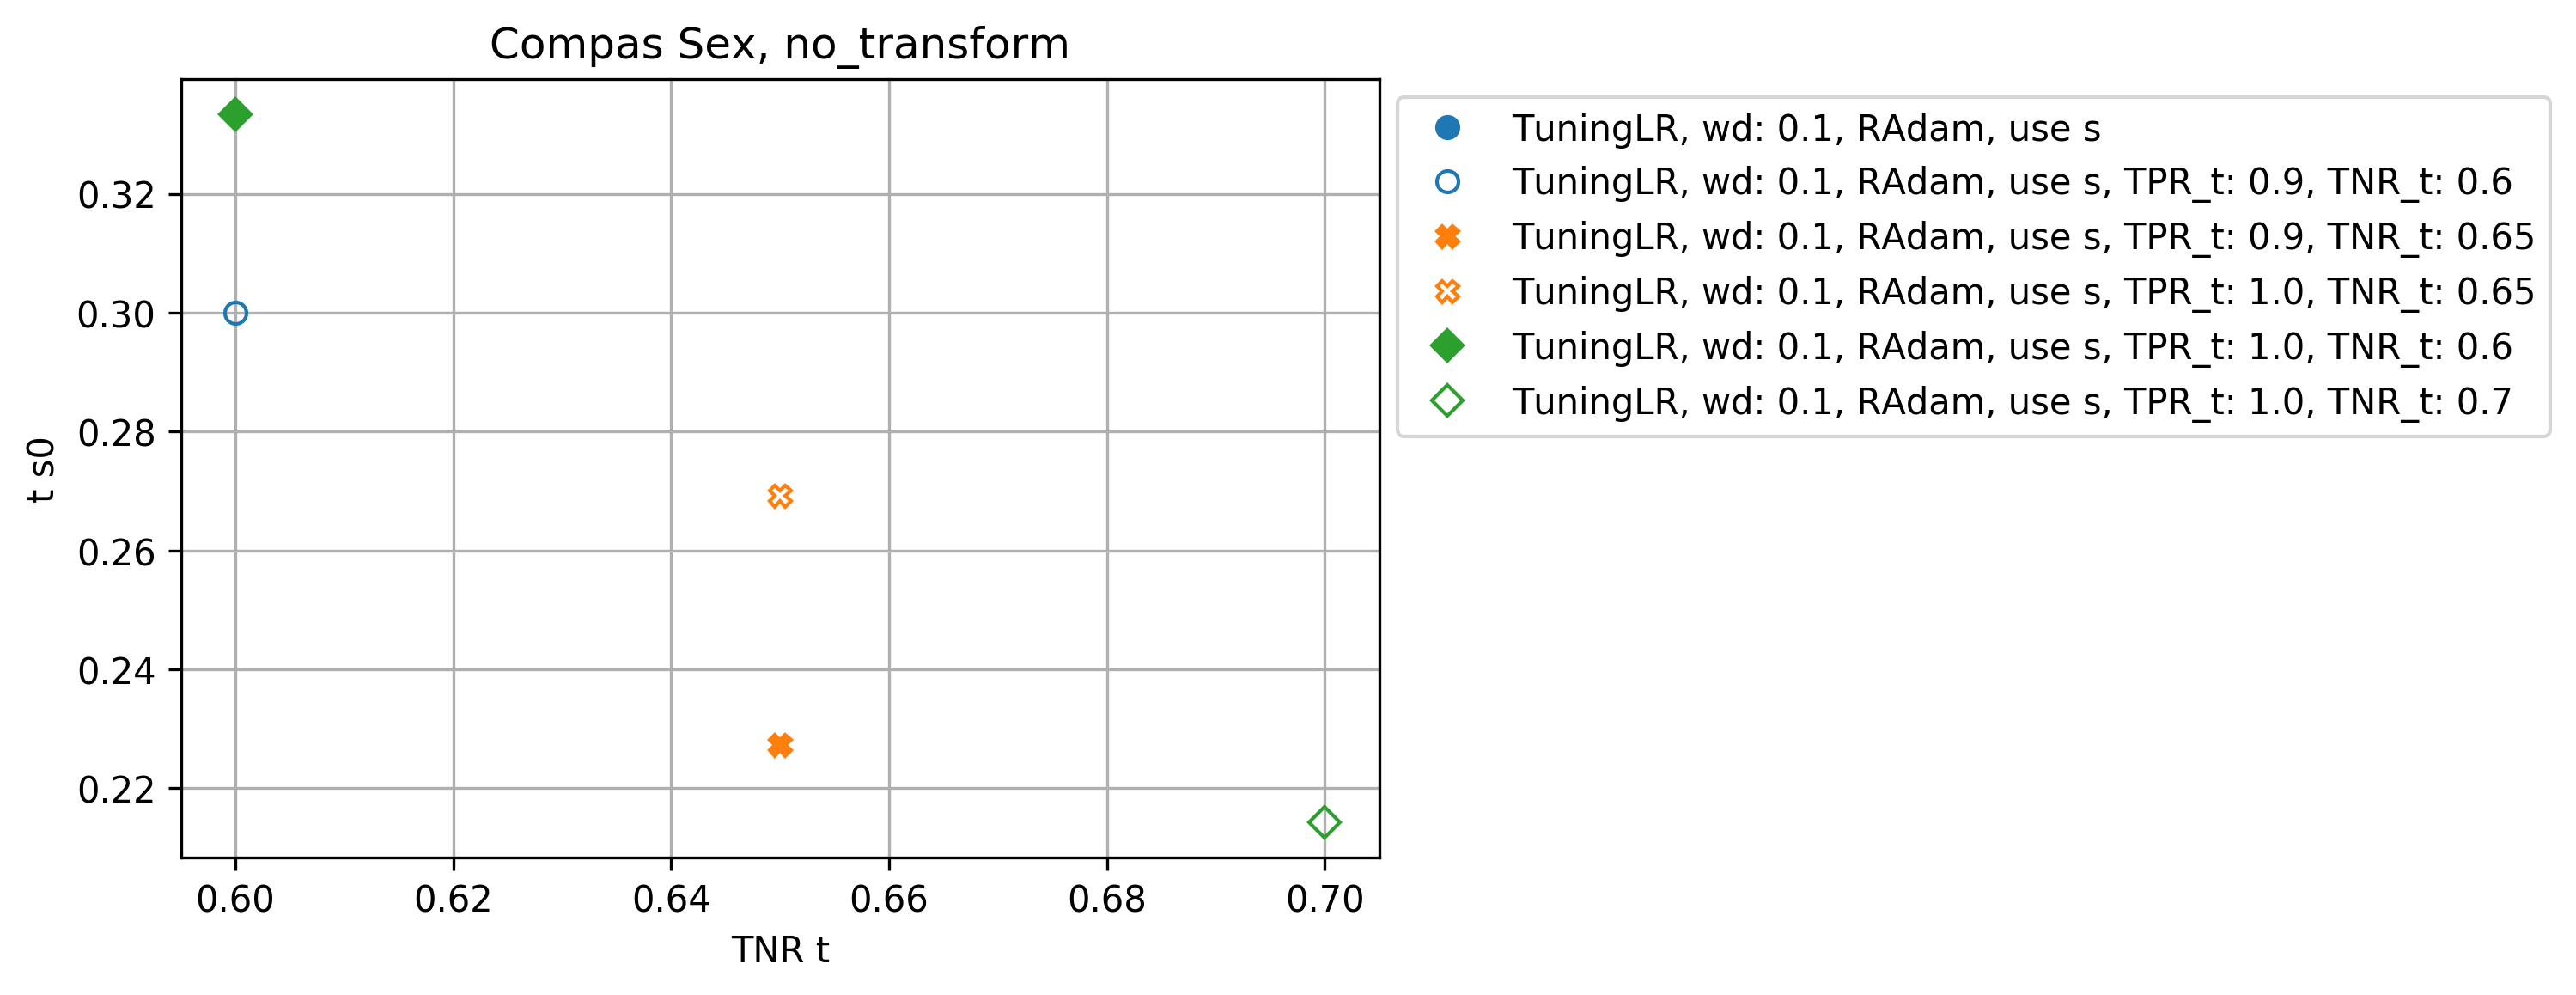

In [27]:
figs_and_plots[1][0]